# Equations différentielles du premier et second ordre (électricité)

On se propose de calculer et tracer les transitoires de courant qui surviennent lorsqu'on ferme l'interrupteur dans deux cas : en l'absence de la bobine et en présence de la bobine.Le circuit comprend un condensateur de capacité C, une résistance R et un générateur de tension de fém E et un interrupteur (K).A t = 0, on ferme (K). 
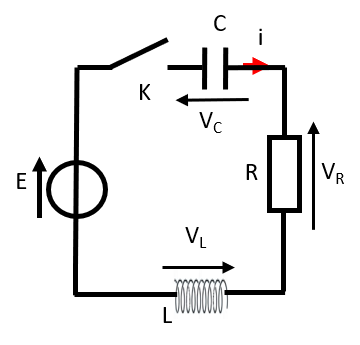

## cas A : en l'absence de bobine

En l'absence de bobine, démontrez que l'équation différentielle du courant s'écrit :
$ \frac{di}{dt} + \frac{i}{\tau} = 0 $ où $ \tau = RC $.

On suppose de plus qu'avant la fermeture de (K), le condensateur était complètement déchargé.

### Question 1.1
Montrez que la solution de l'équation différentielle du courant s'écrit :
$$ i_1(t) = \frac{E}{R}\times e^\frac{-t}{\tau} $$

### Question 1.2
Tracez la solution $i_1(t)$ pour $R = 25\,\Omega$, $C = 3\times 10^{-6}\,\mathrm F$ et $E = 10\,\mathrm V$ 

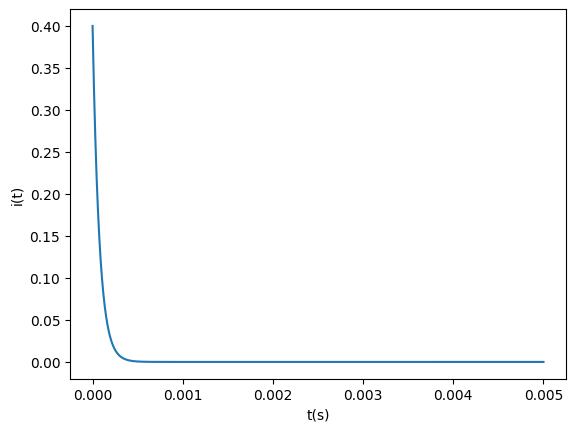

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def func_i_1(t):
    tau = R*C
    return (E/R)*np.exp(-t/tau)

# constantes
R = 25
E = 10
C = 3E-6

X = np.linspace(0, 0.005, 1000)
Y = func_i_1(X)

plt.xlabel("t(s)")
plt.ylabel("i(t)")
plt.plot(X, Y)

## cas B: en présence de bobine
En présence de la bobine, on peut montrer que l'équation différentielle du courant s'écrit :
$ \frac{d^2i}{dt^2} +2 \delta\frac{di}{dt} + \omega_0^2 i = 0 $ où $ \omega_0^2 =\frac{1}{LC} $ et $ \delta = \frac{R}{2L} $.

On suppose de plus qu'avant la fermeture de (K), le condensateur était complètement déchargé et qu'aucun courant ne circulait. 
On peut montrer que cela correspond aux conditions initiales:
$$\left\{ \begin{array}{c}
i(t=0^{+})=0\\
\frac{\mathrm{d}i}{\mathrm{d}t}(t=0^{+})=\frac{E}{L}
\end{array}\right.$$


### Question 2.1
Montrez que dans le cas où $ \delta < \omega_0 $ l'E.D. a pour solution :
$ i_2(t) = A cos(\omega t + \phi) \times e^{-\delta t} $ où $\omega^2= \omega_0^2-\delta^2 $. A et $\phi$ étant deux constantes à déterminer.

**Equation caractéristique:**

$r^2 + 2\delta r + \omega_0^2 = 0$

$\Delta = 4\delta^2 - 4\omega_0^2 \quad \qquad$ Si $\quad\delta < \omega_0 \quad$ alors $\quad \Delta < 0$

Alors on a 2 solutions complexes : $\quad x = \dfrac{-2\delta \pm i\sqrt{-\Delta}}{2} = \dfrac{-2\delta \pm 2i\sqrt{\omega_0^2 - \delta^2}}{2} = -\delta \pm i\omega$

On a alors une solution de la forme: $\quad i_2(t) = A e^{-\delta t}\left( \cos(\omega t + \phi)\right)$

Les conditions initiales donnent: $\quad A\cos(\phi) = 0 \quad \Longleftrightarrow \quad A = 0 \quad \text{ou} \quad \phi = \frac{\pi}{2} [\pi]$

et $\quad i_2(t)' = -e^{-\delta t}A\omega\sin(\omega t + \phi) - \delta e^{-\delta t}A\cos(\omega t + \phi) = -Ae^{-\delta t}\left(\omega\sin(\omega t + \phi) + \delta\cos(\omega t + \phi) \right)$

$i_2(0)' = -A\left(\omega\sin(\phi) + \delta\cos(\phi) \right) = \frac{E}{L} \quad$ donc $A\neq 0 \quad$ donc $\phi = \frac{\pi}{2} [\pi]$

On a alors: 
$$\left\{ \begin{array}{c}
\phi = \dfrac{\pi}{2} [\pi] \\
-A\omega =\dfrac{E}{L}
\end{array}\right.$$

$$\Longleftrightarrow\left\{ \begin{array}{c}
\phi = \dfrac{\pi}{2} [\pi] \\
A=-\dfrac{E}{L\omega}
\end{array}\right.$$

### Question 2.2
Tracez $i_2(t)$ pour $L = 10\,\mathrm{mH}$

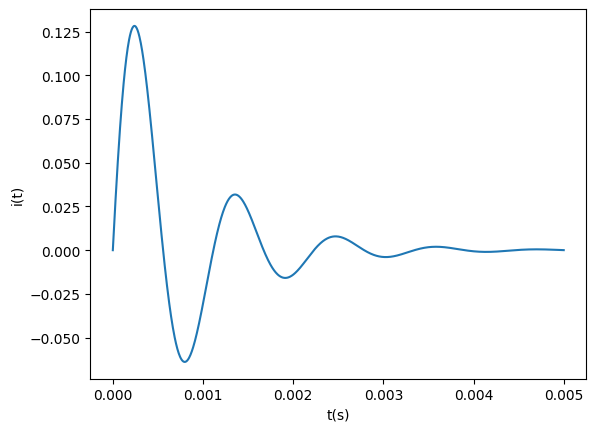

In [3]:
def func_i_2(t):
    w0 = 1/np.sqrt(L*C)
    d = R / (2*L)
    w = np.sqrt(abs(w0**2 - d**2))
    phi = np.pi / 2
    return (-E/(L*w)) * np.exp(-1*d*t) * (np.cos(w*t + phi))

L = 0.01

X = np.linspace(0, 0.005, 1000)
Y = func_i_2(X)

plt.xlabel("t(s)")
plt.ylabel("i(t)")
plt.plot(X, Y)

### Question 3.1
Comment $\Delta$ évolue-t-il quand $R$ augmente? En déduire jusqu'à quelle valeur $R_{critique}$ la forme précédente de solution est valable.

Valeur critique lorsque $\quad \Delta \ge 0 \quad \Longleftrightarrow \quad \delta^2 \ge \omega_0^2 \quad \Longleftrightarrow \quad \frac{R^2}{4L^2} \ge \frac{1}{LC} \quad \Longleftrightarrow \quad R^2 \ge \frac{4L}{C} \quad \Longleftrightarrow \quad R \ge 2\sqrt{\dfrac{L}{C}}$

### Question 3.2
Donner la (les) soliutions(s) pour $R \ge R_{critique}$

$\quad x = \dfrac{-2\delta \pm \sqrt{\Delta}}{2} = \dfrac{-2\delta \pm 2\sqrt{\delta^2-\omega_0^2}}{2} = \dfrac{-2\delta \pm 2\omega'}{2} = -\delta \pm \omega' \quad$ avec $\omega'^2=\delta^2-\omega_0^2$

$i_2(t) = Ae^{r_1 t} + Be^{r_2 t} = Ae^{-(\delta + \omega') t} + Be^{(\omega'-\delta) t} $

$$\left\{ \begin{array}{c}
A + B = 0\\
B(\omega'-\delta) - A(\omega'+\delta) = \dfrac{E}{L}
\end{array}\right.$$

$$\Longleftrightarrow\left\{ \begin{array}{c}
A = -\dfrac{E}{2\omega' L} \\
B = \dfrac{E}{2\omega' L}
\end{array}\right.$$

$i_2(t) = -\dfrac{E}{2\omega' L}e^{-(\delta + \omega') t} + \dfrac{E}{2\omega' L}e^{(\omega'-\delta) t} =  \dfrac{E}{2\omega' L}\left(e^{(\omega'-\delta) t} - e^{-(\delta + \omega') t} \right)$

### Question 3.3
Écrire un scipt qui permet de tracer les solutions pour plusieurs valeurs de $R$. Utilisez-le pour illustrer les différents régimes transitoires de ce problème.

Text(0, 0.5, 'i(t)')

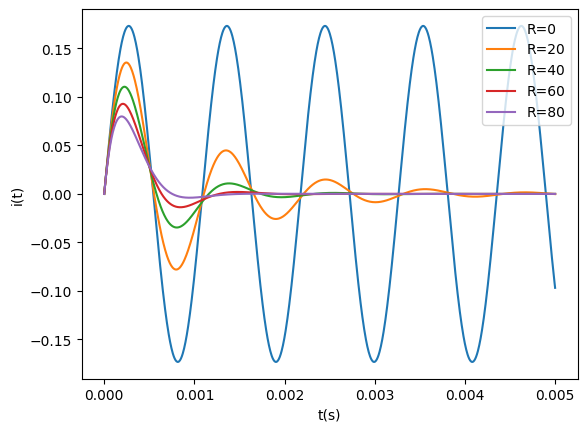

In [21]:
def func_i_3(t):
    w0 = 1/np.sqrt(L*C)
    d = R / (2*L)
    w = np.sqrt(abs(d**2 - w0**2))
    phi = np.pi / 2
    return (-E/(L*w)) * np.exp(-1*d*t) * (np.cos(w*t + phi))

L = 0.01
Rcrit = 2*np.sqrt(L/C)

for R in range(0, 100, 20):
    X = np.linspace(0, 0.005, 1000)
    if R <= Rcrit:
        Y = func_i_2(X)
    else:
        Y = func_i_3(X)
    plt.plot(X, Y)

plt.legend([f"R={i}" for i in range(0, 100, 20)], loc="upper right")
plt.xlabel("t(s)")
plt.ylabel("i(t)")
